# 3. Transformacion de datos

In [31]:
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""transformaciones a las columnas de una matriz de datos"""
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

## 3.1 Analizar muestras

In [2]:
"""importar datos"""
df_total = pd.read_csv('../../araData/Z/total_3_4.csv',low_memory=False)

In [3]:
"""sumar clases"""
cantidad = df_total['Label'].value_counts().rename_axis('Trafico').reset_index(name='Flujos')

In [7]:
df_total.Label.unique()

['Dos', 'Normal', 'Probe']
Categories (3, object): ['Dos', 'Normal', 'Probe']

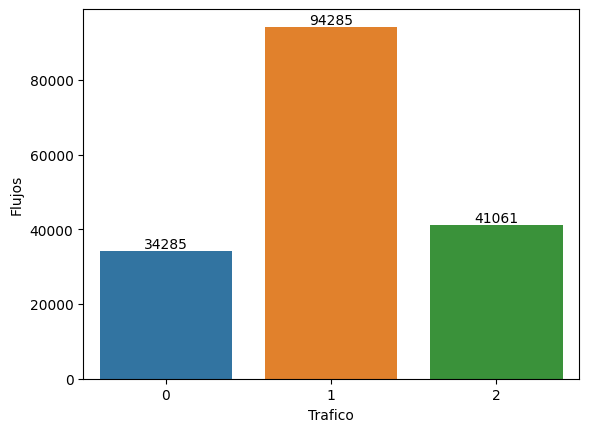

In [4]:
ax = sns.barplot(x='Trafico', y='Flujos', data=cantidad)
ax.bar_label(ax.containers[0])
plt.savefig('cantidad_clasestrafico.png')


In [5]:
df_total.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169631 entries, 0 to 169630
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RunTime     169631 non-null  float64
 1   Dur         169631 non-null  float64
 2   SrcDur      169631 non-null  float64
 3   DstDur      169631 non-null  float64
 4   Mean        169631 non-null  float64
 5   StdDev      169631 non-null  float64
 6   Sum         169631 non-null  float64
 7   Min         169631 non-null  float64
 8   Max         169631 non-null  float64
 9   Dport       169631 non-null  int64  
 10  TotPkts     169631 non-null  int64  
 11  SrcPkts     169631 non-null  int64  
 12  DstPkts     169631 non-null  int64  
 13  TotBytes    169631 non-null  int64  
 14  SrcBytes    169631 non-null  int64  
 15  DstBytes    169631 non-null  int64  
 16  TotAppByte  169631 non-null  int64  
 17  SAppBytes   169631 non-null  int64  
 18  DAppBytes   169631 non-null  int64  
 19  Lo

In [7]:
df_total.describe()

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,Dport,...,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label,Dir_ ->,Dir_ <->,Dir_ <?>,Proto_tcp,Proto_udp
count,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.0,169631.000000,169631.000000,169631.000000,169631.000000,...,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000
mean,2.443665,2.443665,2.430197,2.145518,2.443665,0.0,2.443665,2.443665,2.443665,2830.834447,...,441.761494,1043.655729,65.597249,139.448391,1.039946,0.505350,0.299886,0.194764,0.664171,0.335829
std,5.288742,5.288742,5.277424,5.163470,5.288742,0.0,5.288742,5.288742,5.288742,8439.065138,...,1267.661879,4660.406138,16.281150,141.509002,0.665269,0.499973,0.458209,0.396020,0.472281,0.472281
min,0.000002,0.000002,0.000000,0.000000,0.000002,0.0,0.000002,0.000002,0.000002,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003184,0.003184,0.000000,0.000000,0.003184,0.0,0.003184,0.003184,0.003184,53.000000,...,71.000000,58.000000,54.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.007470,0.007470,0.000000,0.000000,0.007470,0.0,0.007470,0.007470,0.007470,80.000000,...,81.000000,311.000000,66.000000,60.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.038991,1.038991,1.018632,0.058970,1.038991,0.0,1.038991,1.038991,1.038991,749.000000,...,336.000000,543.000000,74.000000,186.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,19.999998,19.999998,19.999998,19.999998,19.999998,0.0,19.999998,19.999998,19.999998,65389.000000,...,65226.000000,65226.000000,1048.000000,1739.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.2 Renombrar

In [18]:
posicion_col= df_total.pop('Label')

In [19]:
df_total.insert(0, 'Label', posicion_col)

In [20]:
df_total.rename(columns={'Dir_   ->':'DirUni','Dir_  <->':'DirBid','Dir_  <?>':'DirDescon','Proto_tcp':'TCP','Proto_udp':'UDP'}, inplace=True)

In [25]:
X = df_total.iloc[:,1:49]
y = df_total.iloc[:,0]

## 3.2 Reduccion de caracteristicas

Sin Normalizar

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0460798  0.04837468 0.05528781 0.05550555 0.         0.08666677
 0.01782197 0.02109091 0.01994799 0.00909558 0.01472668 0.01382445
 0.00648638 0.01270618 0.00920434 0.00536978 0.00233925 0.00313576
 0.00348158 0.008497   0.0002448  0.00876795 0.01349442 0.00045731
 0.         0.         0.         0.         0.         0.
 0.003788   0.00248299 0.00401089 0.00203879 0.00683116 0.02528626
 0.05824268 0.01429195 0.01893319 0.02732915 0.02950125 0.03019505
 0.01721808 0.05793316 0.08112979 0.04457028 0.06670592 0.04690446]


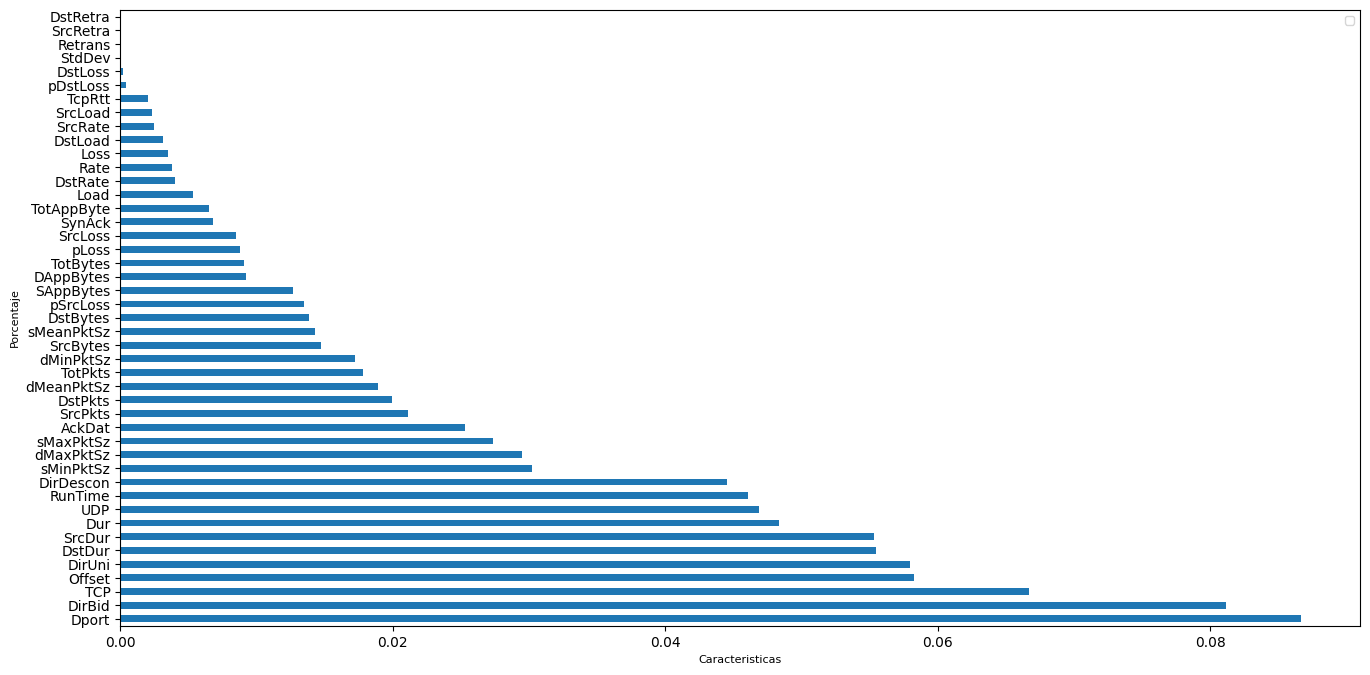

<Figure size 640x480 with 0 Axes>

In [26]:
m_extract_features = ExtraTreesClassifier()
m_extract_features.fit(X,y)
plt.figure(figsize=(16,8))
print(m_extract_features.feature_importances_)
feat_importances = pd.Series(m_extract_features.feature_importances_, index=X.columns)
feat_importances.nlargest(45).plot(kind='barh')
plt.xlabel('Caracteristicas', fontsize = 8)
plt.ylabel('Porcentaje', fontsize = 8)
plt.legend(fontsize="small")
plt.show()
plt.savefig('ExtraTreesClassifier.png')

In [23]:
df_total.drop(['Mean','Sum','Min','Max'], axis="columns", inplace=True)

In [32]:
Corr_Matrix = round(X.corr(),2)
print(Corr_Matrix)

            RunTime   Dur  SrcDur  DstDur  StdDev  Dport  TotPkts  SrcPkts  \
RunTime        1.00  1.00    1.00    0.96     NaN  -0.04     0.15     0.15   
Dur            1.00  1.00    1.00    0.96     NaN  -0.04     0.15     0.15   
SrcDur         1.00  1.00    1.00    0.96     NaN  -0.04     0.15     0.15   
DstDur         0.96  0.96    0.96    1.00     NaN  -0.03     0.15     0.15   
StdDev          NaN   NaN     NaN     NaN     NaN    NaN      NaN      NaN   
Dport         -0.04 -0.04   -0.04   -0.03     NaN   1.00     0.01     0.01   
TotPkts        0.15  0.15    0.15    0.15     NaN   0.01     1.00     0.97   
SrcPkts        0.15  0.15    0.15    0.15     NaN   0.01     0.97     1.00   
DstPkts        0.15  0.15    0.15    0.15     NaN   0.01     0.98     0.90   
TotBytes       0.14  0.14    0.14    0.14     NaN  -0.00     0.69     0.64   
SrcBytes       0.10  0.10    0.10    0.10     NaN   0.01     0.74     0.77   
DstBytes       0.12  0.12    0.12    0.13     NaN  -0.01     0.5

Normalizado

In [30]:
"""guardar estados de datos"""
df_total.to_csv('../../araData/Z/transformacion.csv',index=False)

In [28]:
x_X = np.array(X)

AttributeError: 'numpy.ndarray' object has no attribute 'iteritems'

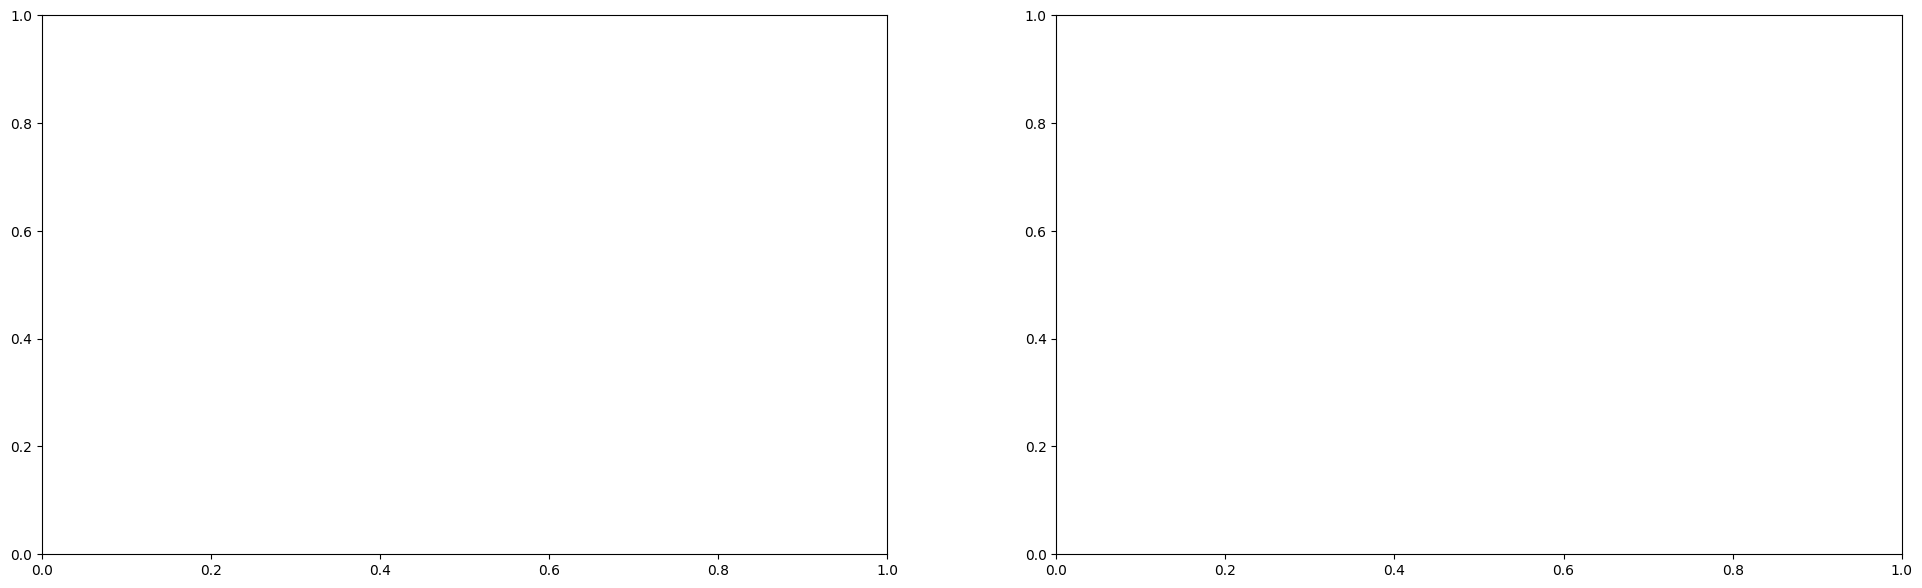

In [29]:
fig, (ax1) = plt.subplots(ncols=2, figsize=(24, 7))
    # let's compare the variable distributions before and after scaling

for (label, content) in x_X.iteritems():
    ax1.set_title('Before Scaling')
    sns.kdeplot(x_X[label], ax=ax1, label=label)
    leg = ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
                    ncol=2, shadow=True, title="Legend", fancybox=True)

In [ ]:
def plotStandarization():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 7))
    # let's compare the variable distributions before and after scaling

    for (label, content) in X.iteritems():
        ax1.set_title('Before Scaling')
        sns.kdeplot(X[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    
    for (label, content) in X_scaled.iteritems():
        ax2.set_title('After Mean Normalisation')
        sns.kdeplot(X_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)

    plt.show() 